# Plot Training Data #
Before starting the training, you can visualize the data distribution

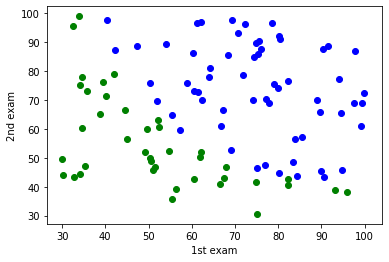

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotutil import plotData

data = np.loadtxt('pa3-data1.csv', delimiter=',')
X_train = data[:,[0,1]].T
y_train = data[:,-1].T

plotData(X_train, y_train, "1st exam", "2nd exam")

In [2]:
def sigmoid(z):

    s = 1 / (1 + np.exp(-z))
    
    return s

In [3]:
def initialize_with_zeros(dim):
   
    print('initialize - dim: ' + str(dim))
    W = np.zeros(shape=(dim, 1))
    w_0 = 0

    assert(W.shape == (dim, 1))
    assert(isinstance(w_0, float) or isinstance(w_0, int))
    return W, w_0

In [4]:
# Gradient Descent Algorithm

def gradient_descent(W, w_0, X, Y, num_iterations, learning_rate, print_cost = True):

    costs = []

    # Get the number of training examples
    m = X.shape[1]
    # Initialize Y_hat and dw
    Z = np.zeros((1, m))
    A = np.zeros((1, m))
    dw = np.zeros(shape=(2, 1))
    
    #print('X shape: ' + str(X.shape))
    #print('Y shape: ' + str(Y.shape))
    #Y = Y.reshape(1,400)
    #Y = Y.T
    #print('Y shape: ' + str(Y.shape))
    
    for i in range(num_iterations):      
        
        # Calculate the heuristic function: z = W.T * X + w_0
        Z = np.dot(W.T, X) + w_0
        A = sigmoid(Z)
        
        # Calculate cost, dw[0], dw[1], and dw_0 
        cost = -1/m * np.sum(Y * np.log(A) + (1-Y) * (np.log(1-A)))

        difference = A - Y
        dw[0] = np.dot(X[0], difference.T)/m
        dw[1] = np.dot(X[1], difference.T)/m
        dw_0 = np.sum(difference)/m
        
        # Update W and w_0
        W = W - learning_rate * dw
        w_0 = w_0 - learning_rate * dw_0
        
        if((i % 100) == 0):
            costs.append(cost)
            
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))      
        
    params = {
        "W": W,
        "w_0": w_0
    }

    grads = {
        "dw": dw,
        "dw_0": dw_0
    }
        
    return params, grads, costs

In [5]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    Y_prediction = np.dot(w.T, X) + b   
    
    return Y_prediction

In [6]:
def normalize(mtx):

    m = mtx.shape[1]
    n = mtx.shape[0]
    
    mean = mtx.sum(axis = 1) / mtx.shape[1]
    mean = mean.reshape(n, 1)
    
    std = np.ptp(mtx,axis=1)
    std = std.reshape(n, 1)
    
    mtx = (mtx - mean) / std
    
    return mtx

In [7]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    dim = X_train.shape[0]
    W, w_0 = initialize_with_zeros(dim)
    
    X_train = normalize(X_train)
    #X_test = normalize(X_test)
       
    # Gradient descent 
    parameters, grads, costs = gradient_descent(W, w_0, X_train, Y_train, num_iterations, learning_rate, print_cost)
        
    # Retrieve parameters w and w_0 from dictionary "parameters"
    W = parameters["W"]
    w_0 = parameters["w_0"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_train = predict(W, w_0, X_train)
    y_prediction_train = predict(W, w_0, X_test)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    #print("ytrain accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))

    print("w is ", W)
    print("w_0 is ", w_0)
    
    d = {"costs": costs,
         "y_prediction_train": y_prediction_train, 
         "Y_prediction_train" : Y_prediction_train, 
         "W" : W, 
         "w_0" : w_0,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [8]:
df = pd.read_csv('pa3-data1.csv', header=None)
X_train = df[[0, 1]].values.T
Y_train = df[2].values.reshape(-1, 1).T

# Plot the Decision Boundary #
After training, you can plot the decision boundary to see how well your model classify the training data

initialize - dim: 2
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.662597
Cost after iteration 200: 0.640261
Cost after iteration 300: 0.621853
Cost after iteration 400: 0.605606
Cost after iteration 500: 0.590766
Cost after iteration 600: 0.576990
Cost after iteration 700: 0.564103
Cost after iteration 800: 0.552001
Cost after iteration 900: 0.540612
train accuracy: 71.55739349354086 %
w is  [[1.20033845]
 [1.05486991]]
w_0 is  0.4119457271562931


NameError: name 'fnc_normalize' is not defined

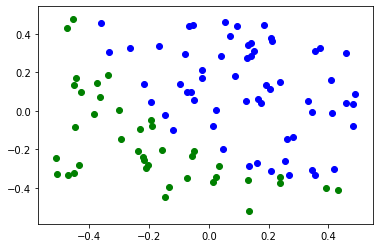

In [9]:
d = model(X_train, y_train, X_train, y_train, num_iterations = 1000, learning_rate = 0.018, print_cost = True)
X_train = normalize(X_train)
plotData(X_train, y_train, xlabel="1st exam", ylabel="2nd exam", w = d["W"], b = d["w_0"], plot_db=True, part_I = False)